LIBRARIES_USED

In [268]:
import tarfile
from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA

FOR LOADING DATASET

In [269]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz 

--2022-09-30 10:30:24--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243346528 (232M) [application/x-gzip]
Saving to: ‘lfw-funneled.tgz.7’

lfw-funneled.tgz.7  100%[===================>] 232.07M   105MB/s    in 2.2s    

2022-09-30 10:30:26 (105 MB/s) - ‘lfw-funneled.tgz.7’ saved [243346528/243346528]



In [270]:
tfile = tarfile.open("lfw-funneled.tgz", "r:gz")
tfile.extractall(".")

In [271]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [272]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #Load the Labeled Faces in the Wild (LFW) people dataset (classification).

Shape, Feature Matrix, Target array

In [273]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [274]:
n_samples, h, w

(1288, 50, 37)

In [275]:
X = lfw_people.data #(1288,1850) #feature_matrix--input to your system
n_features = X.shape[1] #columns #features--X

In [276]:
n_features

1850

In [277]:
y = lfw_people.target   #target array--output of your system
target_names = lfw_people.target_names
n_classes = target_names.shape[0] #rows 

In [278]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [279]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


**Data splitting **

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

APPLYING PCA

In [281]:
n_components=150
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train) #pca on features
eigenfaces = pca.components_.reshape((n_components, h, w))


In [282]:
# transform the data into the principle component representation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

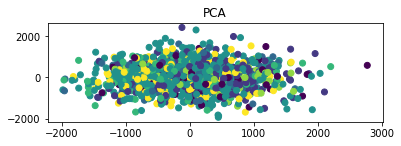

In [283]:
# importing the required moduel
from sklearn.decomposition import PCA

# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
# importing the module
from pylab import *

# subploting and title setting
subplot(2,1,1)
title("PCA")

# plotting the pca
plt.scatter(X_pca[:,0],X_pca[:,1],c= lfw_people.target)
plt.show()

SVC CLASSIFIER

In [284]:
from sklearn.svm import SVC
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [285]:
for i in range(4):
   
    svclassifier = getClassifier(i) 
    clf=svclassifier.fit(X_train_pca, y_train)# Make prediction
    y_pred = clf.predict(X_test_pca)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Evaluation: Polynomial kernel
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.00      0.00      0.00        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.45      1.00      0.62       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

         accuracy                           0.45       322
        macro avg       0.06      0.14      0.09       322
     weighted avg       0.21      0.45      0.28       322

[[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  36   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: RBF kernel
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.31      0.47        13
     Colin Powell       0.87      0.87      0.87        60
  Donald Rumsfeld       1.00      0.52      0.68        27
    George W Bush       0.74      0.99      0.84       146
Gerhard Schroeder       1.00      0.72      0.84        25
      Hugo Chavez       1.00      0.40      0.57        15
       Tony Blair       1.00      0.69      0.82        36

         accuracy                           0.82       322
        macro avg       0.94      0.64      0.73       322
     weighted avg       0.86      0.82      0.80       322

[[  4   2   0   7   0   0   0]
 [  0  52   0   8   0   0   0]
 [  0   1  14  12   0   0   0]
 [  0   2   0 144   0   0   0]
 [  0   1   0   6  18   0   0]
 [  0   2   0   7   0   6   0]
 [  0   0   0  11   0   0  25]]
Evaluation: Sigmoid kernel
                   precision    recall  f1-score   support

     Ariel Sharon   

In [286]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [287]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

In [288]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

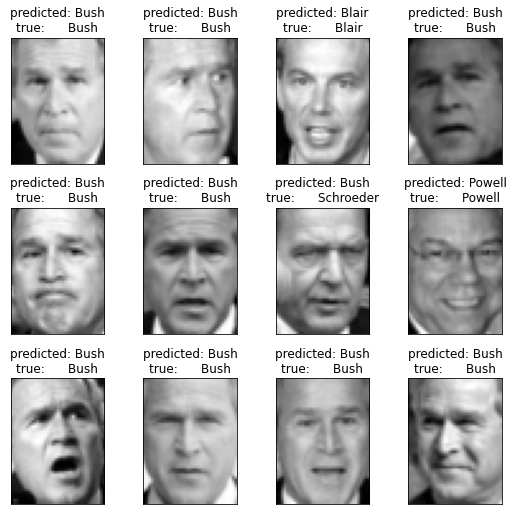

In [289]:
plot_gallery(X_test, prediction_titles, h, w)

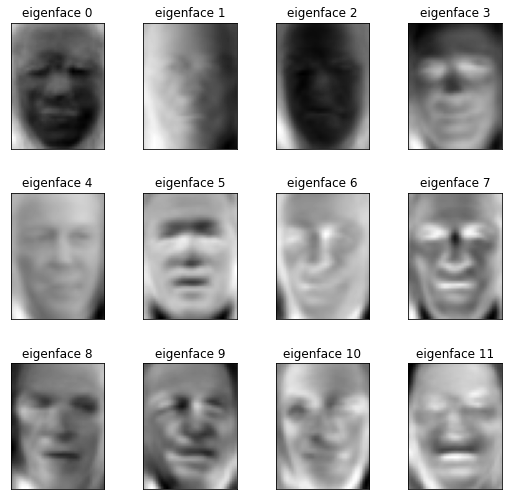

In [290]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()

In [291]:
from sklearn.linear_model import LogisticRegression
#instantiate the model
log_regression = LogisticRegression()
log_regression.fit(X_train_pca,y_train)
    

LogisticRegression()

In [292]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_regression = LogisticRegression()

log_regression.fit(X_train_pca,y_train)
pred_prob1 = log_regression.predict_proba(X_test_pca)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


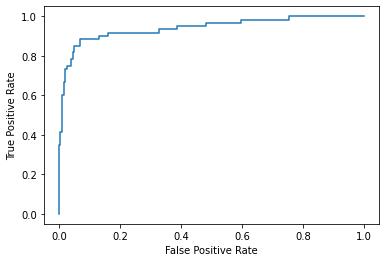

In [293]:
#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

FOR LDA

In [294]:
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# initializing the model
lda_model = LinearDiscriminantAnalysis(n_components=2)

# training the model
lda_model.fit(X_train, y_train)
# testing the model
y_pred = lda_model.predict(X_test)

# printing the accuracy
print(accuracy_score(y_test, y_pred))

0.7018633540372671


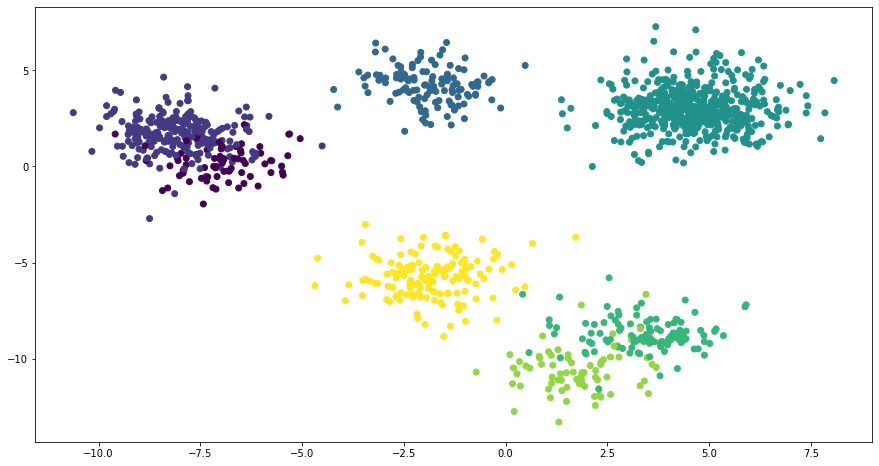

In [295]:
import matplotlib.pyplot as plt

X_r2 = lda_model.fit(X, y).transform(X)
# plot size
plt.figure(figsize=(15, 8))

# plotting the graph
plt.scatter(X_r2[:,0],X_r2[:,1],  c= lfw_people.target)
plt.show()